# Introduction to Basic Statistics in Python  
https://wikidocs.net/165583

## 1. Probability & Distribution

- 확률 분포 : Probability distribution
- 확률 변수 : Random variable
- 확률 : Probability

### 1.1 Probability

[Uniform distribution]  
공정한 동전을 던졌을 때, Head 또는 Tail이 나올 확률을 구하는 함수를 작성해보세요.

In [3]:
def pmf_coin(outcome):
    """
    outcome(str): head, tail, or something else.
    return: probability of the outcome status - 0.5 for head, 0.5 for tail, 0 for others. 
    """
    if outcome.lower() in ['head', 'tail']:
        p = 0.5
        print(f"P(X = x) = {p:.2f}")
    else:
        p = 0
        print(f"P(X = x) = {p:.2f}")

In [6]:
pmf_coin('Head')
pmf_coin("Tail")
pmf_coin('etc')

P(X = x) = 0.50
P(X = x) = 0.50
P(X = x) = 0.00


**Models by Distribution**
* **t-test**:  
  t-distribution을 사용한 모델
* **Bernoulli distribution**:
  전환률, 사망률 등 모든 확률의 문제는 베르누이분포로 환원될 수 있다.  
  결과가 두 가지인 분류 문제(e.g., Logistic regression)가 베르누이분포와 연괸되어 있다.
* **Linear regression**:
  residuals에 대해 일관된 variance와 independence를 가정한다.  
  가정이 맞지 않다면 coefficient를 의도대로 해석할 수 없다. (ANOVA검정은 선형회귀의 특수한 케이스 중 하나)
* **K-means clustering**:
  각 cluster에 대해 독립적이며 분산이 같은 정규분포를 가정한다.  
  covariance matrix의 제약을 풀면 GMM(Gaussian Mixture Model)이 된다.  
  이러한 한계를 이해하려면 Multi-variate normal distribution을 이해해야 한다.
* **LDA(Latent Dirichlet Allocation)**:  
  잠재 디리클레 할당, 디리클레 분포를 직접적으로 사용.
  다항 분포(이항 분포의 확장)와도 관련이 있다.

### 1.2 Probability Distribution

[Bernoulli distribution]  
파이썬으로 베르누이 분포를 구현해 보세요.

In [11]:
def pmf_bern(p, x):
    """
    Return probability of Bernoulli distribution of given p and x values.
    p: parameter, 0 to 1.
    x: status, 0 or 1 only.
    
    """
    if x in [0, 1]:
        prob = p**x * (1-p)**(1-x)
    else:
        prob = 0
    print(f"P(X={x}; p={p}) = {prob:.2f}")

In [12]:
pmf_bern(p=0.7, x=1)
pmf_bern(p=0.2, x=1)
pmf_bern(p=0.2, x=0)

P(X=1; p=0.7) = 0.70
P(X=1; p=0.2) = 0.20
P(X=0; p=0.2) = 0.80


결과가 두 가지인 Binary 상황은 일반적으로 베르누이로 다룰 수 있어 무척 흔하게 쓰인다.(e.g., Sigmoid function)

### 1.3 pmf vs. pdf

**pmf(Probability Mass Function, 확률 질량 함수)**:  
RV의 값들이 이산적인 이산형 확률 분포(Discrete Probability Distribution)(e.g., Bernoulli dist.)에 대한 확률 함수. 0~1 사이 값을 갖는다.  
**pdf(Probability Density Function, 확률 밀도 함수)**:  
Continuous RV를 갖는 연속형 확률 분포(Continuous Probability Distribution)에 대한 확률 함수. 1보다 클 수 있다.

파이썬으로 연속형 확률 분포의 하나인 연속 균등 분포(Continous uniform distribution)을 구현해 보세요.

In [14]:
def pdf_unif(x, a=0, b=1):
    """
    Return probability of uniform distribution of given a, b, and x values.
    """
    if (x > a) & (x < b):
        prob = (x-a)/(b-a)
    else:
        prob = 0
    print("P(X=%s; a=%s, b=%s) = %.2f"%(x, a, b, prob))

In [17]:
pdf_unif(x = 0.5)
pdf_unif(x=0, a=-1, b=2)
pdf_unif(x=2.5, a=0, b=3.5)

P(X=0.5; a=0, b=1) = 0.50
P(X=0; a=-1, b=2) = 0.33
P(X=2.5; a=0, b=3.5) = 0.71


### 1.4 Normal Distribution

정규 분포,  
자연적으로 흔히 발견되는 분포이기도 하고,
CLT(Central Limit Theorem, 중심극한정리)으로 인해 표본 평균의 분포가 정규분포를 따르게 된다.

[Parameters]
- Mean(μ): 정규분포의 평균은 0.
- Variance(σ^2)
- Standard deviation(σ): 데이터가 얼마나 퍼져있는가를 보여주는 지표.  
  mean과 같은 단위 사용. 정규분포의 표준편차는 1.

[Parameter Space]
- Mean: 임의의 실수
- Variance: 0보다 큰 실수

파이썬으로 정규 분포를 구현해 보세요.

In [27]:
from scipy.stats import norm
import numpy as np

def pdf_norm(x, mu = 0, sigma = 1):
    """
    return probability of normal distribution to given x, mu, and sigma values.
    """
    prob = norm.pdf(x, mu, sigma)
    
    # or
    # prob = 1/(sigma*np.sqrt(2 * np.pi)) * np.exp((x - mu)**2 / (2 * sigma**2))
    
    print(f"P(X={x}; mu={mu}; sigma={sigma}) = {prob:.2f}")

In [23]:
pdf_norm(0)
pdf_norm(1.96, 0, 1)
pdf_norm(-1, 2, 10)

P(X=0; mu=0; sigma=1) = 0.40
P(X=1.96; mu=0; sigma=1) = 0.06
P(X=-1; mu=2; sigma=10) = 0.04


1. 평균이 μ이고 표준편차가 σ인 정규분포  
**X ~ _Normal_(μ, σ^2)**
2. X를 다음과 같이 변환한 RV를 Y라고 하면,  
   **Y = (X-μ)/σ**
3. 이렇게 변환된 Y는 **표준정규분포**를 따르게 된다.  
   **Y ~ _Normal_(0,1)**  
  
이렇게 평균을 빼고 표준편차로 나눠준 값을 z-score라고 한다.

### 1.5 Binomial Distribution

Bernoulli distribution은 1회의 시도에서 성공/실패를 다루었던 분포이다.  
Binomial distribution(이항분포)는 이를 n번의 시도로 확장한 분포이다.  
즉, n회의 베르누이 시행을 합한 것으로 볼 수 있다.  
이항분포의 확률질량함수(pmf)는 다음과 같다.  
$P(X=x;n,p) = (^n_x)p^x(1-p)^{(n-x)}, x=0, 1, ..., n,$  

In [39]:
from scipy.stats import binom
import math

def pmf_binom(x, n, p):
    """
    x: 사건 발생 횟수
    n: 총 시행 횟수
    p: 사건 발생 확률
    """
    prob = binom.pmf(x, n, p)

    # or
    # prob = math.comb(n, x) * p**x * (1-p)**(n-x)
    print(f"P(X={x}; n={n}, p={p}) = {prob:.2f}")

In [40]:
pmf_binom(3, 10, 0.3)
pmf_binom(7, 10, 0.7)
pmf_binom(x=50, n=100, p=0.1)

P(X=3; n=10, p=0.3) = 0.27
P(X=7; n=10, p=0.7) = 0.27
P(X=50; n=100, p=0.1) = 0.00


[Parameters]
- n: Number of total trials
- x: Number of inccidents (RV)
- p: Probability of each incident
- mean = $np$
- variance = $np(1-p)$  

n이 고정되어 있을 때, p의 값이 0이나 1에 가까울수록 분산값이 커지고, p=0.5일때 분산이 최소가 된다. (기하평균으로 증명)

[Parameter Space]
- n: 1보다 크거나 같은 정수
- p: 0과 1 사이의 실수

### 1.6 Poisson Distribution

흔히 '단위 시간/공간 당 사건의 발생 횟수'에 대한 확률 분포.  
e.g., 1시간에 몇 건의 구매가 발생했는가?  

[Parameters]
- λ: mean & variance (NOT std!)

[Support]  
: Random Variable X에서 확률이 0보다 큰 x의 집합  
  음이 아닌 모든 정수

[Parameter Space]  
- λ: 양의 실수


포아송분포의 합은 1이다. (오일러상수 e=2.7817...의 유도를 이용해 증명)  
$P(X=x;λ) = \frac{λ^xe^{-λ}}{x!}, x=0, 1,  2, ...$  
Poisson distribution의 가장 큰 특징 중 하나는 평균과 분산이 모두 λ로 같다는 것인데,  
실제 데이터로부터 포아송 관련 모델링을 하면 평균보다 분산이 큰 경우가 더 많다.  
이를 **과산포Overdispersion**라고 한다. 이를 해결하기 위해 **음이항 분포Negative Binomial**을 사용하기도 한다.

In [61]:
from scipy.stats import poisson
import matplotlib.pyplot as plt

def pmf_poisson_plotting(lamb):
    """
    Visualise probabilities to the given lambda.
    x ranges [0, 3*lambda].
    """
    xs = range(0, 3*lamb)
    ps = poisson.pmf(xs, lamb)

    fig, ax = plt.subplots()
    ax.plot(xs, 
            ps, 
            marker = 'o')
    plt.title(f"Poisson({lamb})")
    plt.show()

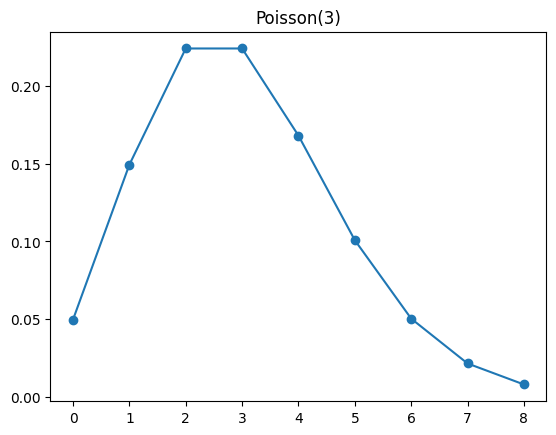

In [62]:
pmf_poisson_plotting(3)

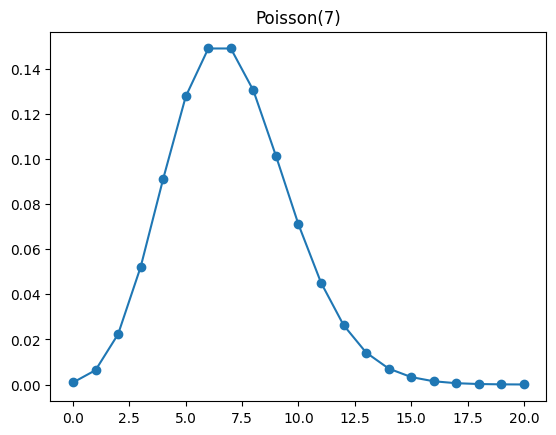

In [64]:
pmf_poisson_plotting(7)

Poisson 분포는 이항분포로부터 유도될 수 있다. 이항분포에서 n이 무척 크고, p가 낮아지면 λ=np인 포아송으로 근사가 가능하다.  
e.g., 책의 한 페이지에서 나타날 수 있는 오탈자의 수.  
글자 수(n)가 많고, 오탈자의 수는 무척 적다(작은 p) >> poisson 관점에서는 각 페이지를 단위 공간으로 보고, 페이지당 오탈자의 수가 포아송분포를 따른다고 볼 수 있다.  
e.g., 하루에 판매되는 평균 커피의 수가 100잔인 카페.  
λ = 100의 포아송분포를 따른다 >> RV: 하루에 판매된 커피의 수  
각 판매된 커피 잔 수에 따른 확률(p)값 존재  
딱 100잔 팔릴 확률이 0.0397이라고 한다면, 포아송 확률 분포의 함수를 이용하여  
$P(X = 100; λ = 100) = 0.039861$ 으로 나타나는 함수가 확률 분포이다.

### 1.7 Standardization and Normalization

여러 자료의 단위를 맞추는 방법 중 가장 널리 쓰이는 두가지 방법.  
- Standardization(표준화) : mean 0, std 1로 맞춰주는 변환  
  $X = \frac{X-\bar{X}}{std(X)}$
- Normalization(정규화) : min 0, max 1로 맞춰주는 변환  
  $X = \frac{X - min(X)}{max(X) - min(X)}$

통계에서는 표준화를, 딥러닝에서는 정규화를 좀 더 자주 사용하는 편.  
두 방법 모두 데이터의 분포 형태에 영향을 주지는 않으나, 값의 위치와 퍼진 정도를 수치적으로 바꿔준다.

In [69]:
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt

iris = datasets.load_iris()
X = pd.DataFrame(iris.data, columns = iris['feature_names'])

sepal_length = X['sepal length (cm)']
sepal_length_standardized = (sepal_length - sepal_length.mean())/sepal_length.std()
sepal_length_normalized = (sepal_length - sepal_length.min()) / (sepal_length.max() - sepal_length.min())

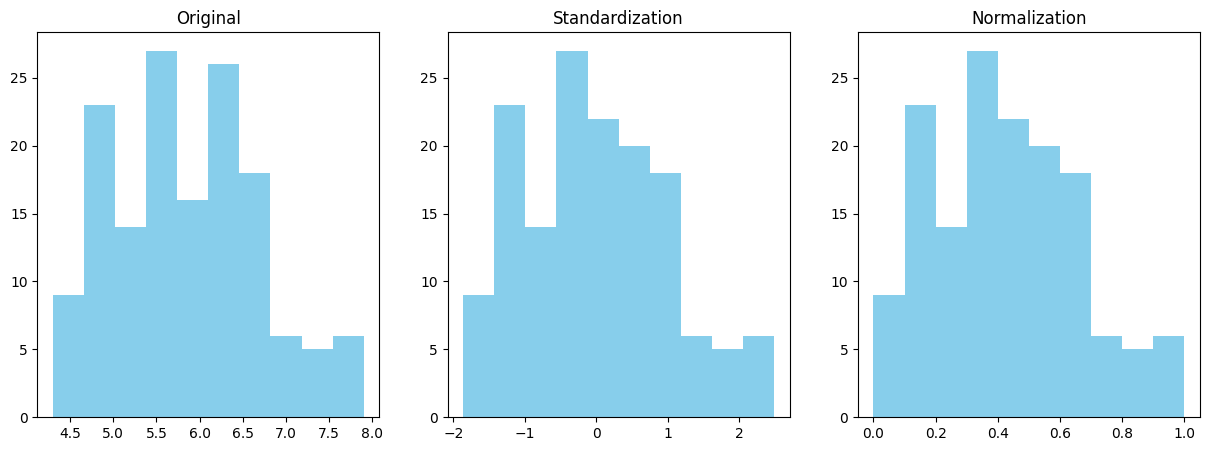

In [71]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, figsize = (15, 5))
ax1.hist(sepal_length, color = 'skyblue')
ax1.set_title('Original')

ax2.hist(sepal_length_standardized, color = 'skyblue')
ax2.set_title('Standardization')

ax3.hist(sepal_length_normalized, color = 'skyblue')
ax3.set_title('Normalization')

plt.show()

표준화와 정규화를 **Scaling**이라고도 부른다.  
두 방법 중 어느 하나가 더 낫다고 보기는 어렵고, 상황에 따라 더 적합한 방법을 선택해야 한다.

### 1.8 Approximation

CLT(중심극한정리)는 임의의 분포의 표본평균이 정규분포로 근사된다는 것이다. 이처럼 우리는 수많은 문제를 정규 분포로 환원하여 풀이할 수 있다.  
근사는 되었다/안되었다의 이분법적인 개념이 아닌, '*얼마나* 근사가 되었다'로 표현하는 문제이다.

In [75]:
from scipy.stats import binom, poisson, norm
import matplotlib.pyplot as plt

def poisson_binom_plot(n, p):
    lamb = n*p
    mu = n*p
    std = (n*p*(1-p))**(1/2)

    x_min = int(-n * 0.2)
    x_max = int(n * 1.2)

    probs_binom = [binom.pmf(i, n, p) for i in range(x_min, x_max+1)]
    probs_poisson = [poisson.pmf(i, lamb) for i in range(x_min, x_max+1)]
    probs_norm = [norm.pdf(i, mu, std) for i in range(x_min, x_max+1)]

    plt.plot(range(x_min, x_max+1), probs_binom, alpha = 0.5)
    plt.plot(range(x_min, x_max+1), probs_poisson, alpha = 0.5)
    plt.plot(range(x_min, x_max+1), probs_norm, alpha = 0.5)
    plt.legend(['binom', 'poisson', 'norm'])
    plt.title(f"N={n}, p={p}")
    plt.show()

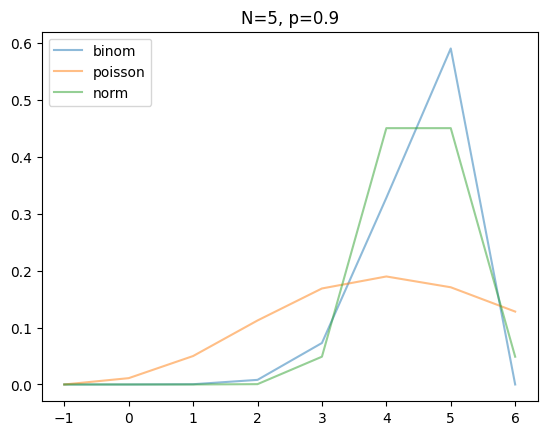

In [76]:
poisson_binom_plot(5, 0.9)

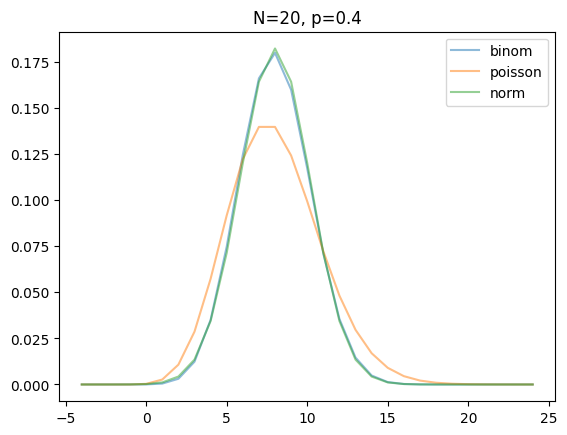

In [77]:
poisson_binom_plot(20, 0.4)

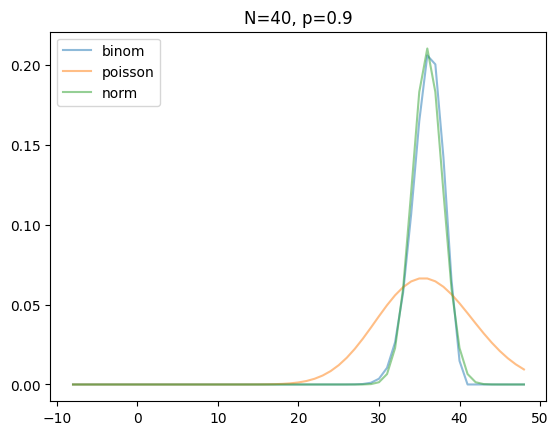

In [78]:
poisson_binom_plot(40, 0.9)

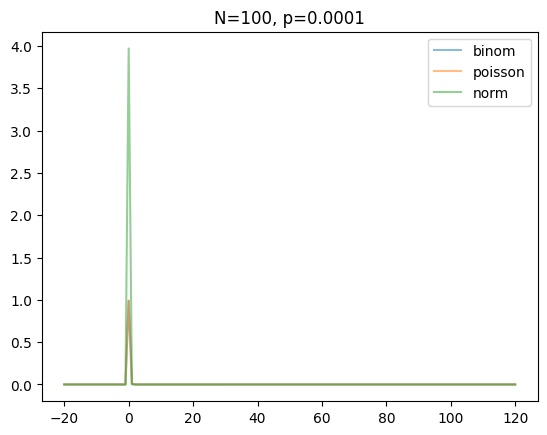

In [79]:
poisson_binom_plot(100, 0.0001)

위에서 보이듯, 정규분포는 n이 꽤 작은 값일 때에도 이항분포와 거의 비슷한 분포를 보여준다.  
하지만 p가 매우 작아지거나 커지면 근사가 꽤 어긋날수 있다.   
더 큰 문제는, p가 0이나 1에 가까워지면 random variable X가 0보다 작거나 n보다 클 확률이 0보다 커질 수있다.  
(이는 10개의 동전을 던졌을 때 앞면이 11개 또는 -1개가 나올 확률이 0보다 크다는 의미로, 말이 되지 않는 경우들이다.)  
모비율 검정에 대한 신뢰구간을 구할 때에도 비슷한 문제가 발생해 확률에 대한 신뢰구간에 0 이하의 값이나 1 이상의 값을 포함할 수 있다.

정규 분포와 달리 이항 분포는 비대칭이며, 특히 p가 0이나 1에 가까워지면 비대칭이 심해진다.  
일례로 광고의 CTR(Click Through Rate)은 일반적으로 1% 미만이며, 추천 시스템에서 다루는 노출 대비 클릭 또한 그러하다. 이런 경우 n이 충분하지 않으면 근사에 대한 위험이 발생할 수 있다.  
물론 반대로 말하면 n이 엄청나게 크다면 무슨 방법을 쓰더라도 같은 결과가 돌아온다는 뜻이다.

n이 작은 경우라면 비율에 대한 검정에서 정규 근사 대신 이항 분포를 직접적으로 이용하거나, 베이지안 통계학을 도입할 수 있다. n이 압도적으로 크다면 정규 근사를 이용하는 것이 편하다.

### 1.9 Negative Binomial Distribution

[문제]  
당신은 영업을 뛰고 있으며, 각 잠재 고객에게 영업이 성공할 확률은 동일하게 70%라고 가정한다.  
당신은 하루에 10건의 영업을 성공시키면 집에 갈 수 있다!  
이때, 영업 성공 횟수가 이항분포를 따르는지 확인해보기 위한 시뮬레이션을 완성시켜라.

In [136]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from collections import Counter

def try_till_success(n):
    """
    1. 1회씩 시도(Bernoulli)하여 성공 횟수가 10회 누적될 때까지 try count를 누적시킨다.
    2. 10번 성공하면 try_counts에 append한 뒤 초기화한다.
    3. 1~2를 n회 반복한다.
    *numpy library에는 Bernoulli가 없으니 이항분포에서 n=1로 입력하여 대체한다.
    """
    try_counts = []
    for _ in tqdm(range(n)):
        try_count = 0
        success_count = 0
        while success_count < 10:
            try_count += 1
            if np.random.binomial(n=1, p=0.7):
                success_count += 1
        try_counts.append(try_count)

    return try_counts

In [137]:
try_till_success(20)

100%|███████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 17490.84it/s]


[15,
 14,
 15,
 10,
 13,
 18,
 15,
 17,
 18,
 16,
 19,
 13,
 14,
 17,
 12,
 14,
 16,
 17,
 12,
 13]

In [138]:
n = 100000
p = 0.7

try_list = try_till_success(n)
nb_list = [10 + np.random.negative_binomial(10, p) for _ in range(n)]
binom_list = [np.random.binomial(int(10/0.7**2), p) for _ in range(n)]

try_counter = Counter(try_list)
nb_counter = Counter(nb_list)
binom_counter = Counter(binom_list)

100%|███████████████████████████████████████████████████████████████████████| 100000/100000 [00:05<00:00, 17073.59it/s]


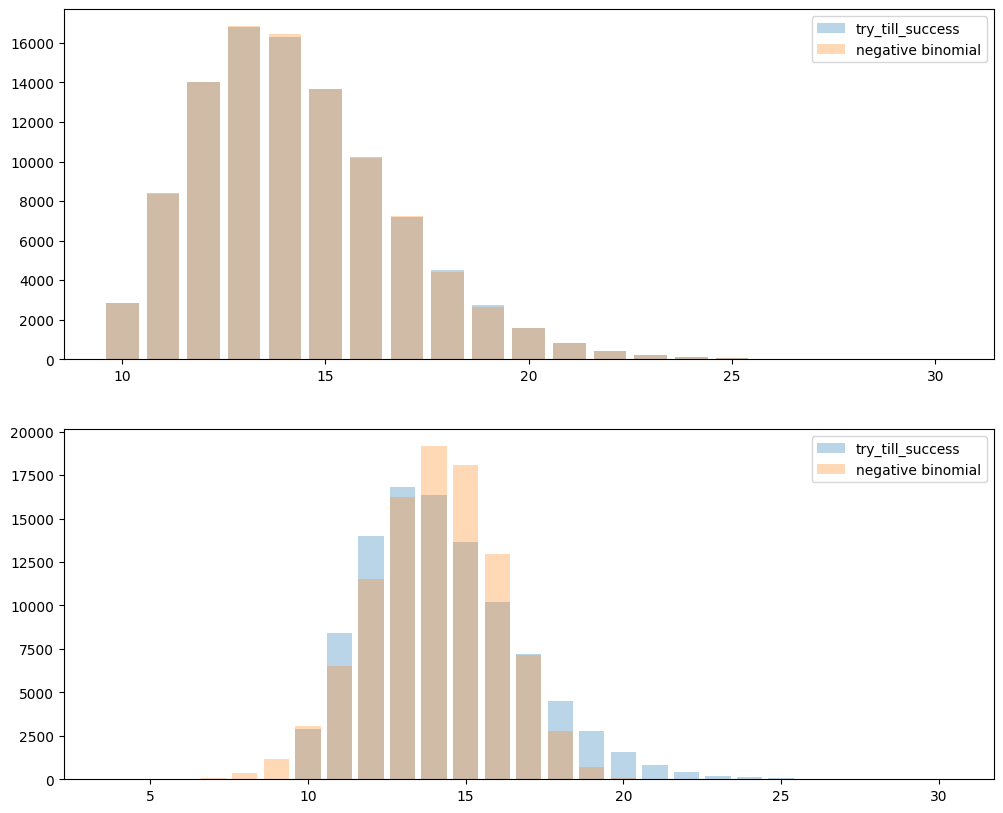

In [139]:
plt.figure(figsize = (12, 10))

plt.subplot(2, 1, 1)
plt.bar(try_counter.keys(), try_counter.values(), alpha = 0.3)
plt.bar(nb_counter.keys(), nb_counter.values(), alpha = 0.3)
plt.legend(['try_till_success', 'negative binomial'])

plt.subplot(2, 1, 2)
plt.bar(try_counter.keys(), try_counter.values(), alpha = 0.3)
plt.bar(binom_counter.keys(), binom_counter.values(), alpha = 0.3)
plt.legend(['try_till_success', 'negative binomial'])

plt.show()

결과값이 두 가지만 있는 것 > Bernoulli distribution을 따른다.  
이를 n번으로 확장하면 > Binomial distribution을 따른다.  
하지만, 이는 n번의 베르누이시행이 independent해야 하고, n값이 고정되어 있어야 한다.  
이런 제약이 지켜지지 않으면 이항분포를 따르지 않을 수 있는데, 가장 대표적인 케이스가 **음이항분포Negative Binomial Distribution**이다.

**Negative Binomial Distribution**  
p의 확률로 r번 성공할 때까지 베르누이를 시행하는 확률분포.  
성공이 아닌 실패가 포인트라 'negative'.  이항분포와 같이 p라는 parameter를 갖지만, 이항분포와 달리 시행이 아닌 성공횟수를 r로 표현한다.  
성공할 때까지 베르누이가 실행되기 때문에 시행 횟수는 고정되지 않는다.  
$P(X=x;r,p) = (^{r+x-1}_{r-1})p^r(1-p)^x, x=0, 1, ...$

음이항분포는 생각보다 흔한데, 분포 형태가 이항분포와 꽤 달라 음이항분포를 이항분포로 모델링하게 되면 신뢰도나 정확도가 크게 떨어질 수 있다.  
예를 들어 위의 문제를 보면, 영업은 성공/실패 두 가지 결과밖에 없으니 이를 이항분포로 볼 수 있을까?  
결론을 말하자면 아니다. 만일 이항분포라고 하더라도, n을 고정된 값으로 정하기 어렵다. 매일매일의 n이 다를 것이고, 임의성 또한 존재해 random variable로 보인다. 이항분포의 parameter인 n은 고정된 상수여야 한다.  

Negative binomial distribution에서 성공 횟수(r)가 1로 고정된 분포를 **기하분포Geometric Distribution**라고 하며, 유한한 샘플에서의 시도를 다루는 분포를 **초기하분포Hypergeometric Distribution**라고 한다. 